# Binary Cancer Classification

In [1]:
import pandas as pd
import numpy as np
import torch
import os
import matplotlib.pyplot as plt


In [2]:
path1_cancer = '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/'
path1_non_cancer = '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Non_Cancer/'

In [3]:
p1=os.listdir(path1_cancer+'Training')
p2 = os.listdir(path1_non_cancer+'Training')
l1 = [path1_cancer+'Training/'+x for x in p1]
l2 = [path1_non_cancer+'Training/'+x for x in p2]
img_paths1_train = np.hstack([l1,l2])

p1=os.listdir(path1_cancer+'Testing')
p2 = os.listdir(path1_non_cancer+'Testing')
l1 = [path1_cancer+'Testing/'+x for x in p1]
l2 = [path1_non_cancer+'Testing/'+x for x in p2]
img_paths1_test = np.hstack([l1,l2])
len(img_paths1_train)

labels1_train=[]
for i in img_paths1_train:
    if 'Non_Cancer' in i:
        labels1_train.append(0)
    else:
        labels1_train.append(1)

labels1_test=[]
for i in img_paths1_test:
    if 'Non_Cancer' in i:
        labels1_test.append(0)
    else:
        labels1_test.append(1)
labels1_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [4]:
img_paths1_train

array(['../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1007-1.jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1010-01.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1012-2.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1031-1.jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1051-3(94).jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1051-3(95).jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/113-1.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1157-01.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/120.2.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1239-2.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Tr

In [5]:
path2_cancer_test = '../datasets/cancer/binary/binary-skin-cancer2/data/test/malignant/'
path2_non_cancer_test = '../datasets/cancer/binary/binary-skin-cancer2/data/test/benign/'

path2_cancer_train = '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\malignant/'
path2_non_cancer_train = '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/'

In [6]:
p1=os.listdir(path2_cancer_test)
p2 = os.listdir(path2_non_cancer_test)
l1 = [path2_cancer_test+x for x in p1]
l2 = [path2_non_cancer_test+x for x in p2]
img_paths2_test = np.hstack([l1,l2])

labels2_test=[]
for i in img_paths2_test:
    if 'benign' in i:
        labels2_test.append(0)
    else:
        labels2_test.append(1)


p1=os.listdir(path2_cancer_train)
p2 = os.listdir(path2_non_cancer_train)
l1 = [path2_cancer_train+x for x in p1]
l2 = [path2_non_cancer_train+x for x in p2]
img_paths2_train = np.hstack([l1,l2])

labels2_train=[]
for i in img_paths2_train:
    if 'benign' in i:
        labels2_train.append(0)
    else:
        labels2_train.append(1)
labels2_test


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [7]:
test_paths = np.hstack([img_paths1_test,img_paths2_test])
test_labels = np.hstack([labels1_test,labels2_test])

train_paths = np.hstack([img_paths1_train,img_paths2_train])
train_labels = np.hstack([labels1_train,labels2_train])
train_paths

array(['../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1007-1.jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1010-01.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1012-2.JPG',
       ...,
       '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/996.jpg',
       '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/997.jpg',
       '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/999.jpg'],
      dtype='<U88')

In [8]:
train_labels

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
train_labels.shape

(2877,)

In [10]:
train_paths.shape

(2877,)

In [11]:
test_paths.shape

(708,)

In [12]:
import cv2
count=0
test_images = np.zeros([len(test_paths),224,224,3])
for i in test_paths:
    im= cv2.resize(cv2.imread(i),[224,224])
    im = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
    im = np.nan_to_num(im)
    test_images[count]=im
    count=count+1

In [13]:
import cv2
count=0
train_images = np.zeros([2877,224,224,3])
for i in train_paths:
    im= cv2.resize(cv2.imread(i),[224,224])
    im = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
    im = np.nan_to_num(im)
    train_images[count]=im
    count=count+1

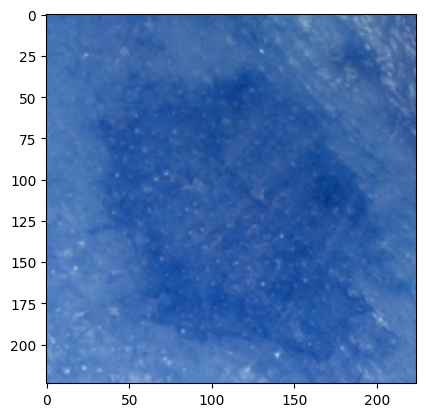

In [14]:
plt.imshow(train_images[2],cmap='jet')

In [14]:
import timm
import torch.nn as nn
# model = nn.Sequential(timm.create_model('davit_tiny.msft_in1k', drop_path_rate=.2,num_classes=1,pretrained=True), nn.Sigmoid())
# model

In [15]:
train_images = torch.tensor(train_images)
test_images = torch.tensor(test_images)
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

In [16]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        images = self.images[index]
        labels = self.labels[index]
        return images.float(), labels.float()


In [37]:
from torch.optim.lr_scheduler import ExponentialLR
import torch.optim as optim

dataset = CustomDataset(train_images, train_labels)
# Create a dataloader
batch_size = 32

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = CustomDataset(test_images,test_labels)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 64
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

criterion = nn.BCELoss()
# optimizer = optim.AdamW(model.parameters(),lr=0.0001,weight_decay=.001)
# gamma = .9994
# scheduler = ExponentialLR(optimizer, gamma=gamma)

In [38]:
x,y = next(iter(dataloader))

tensor(1.)

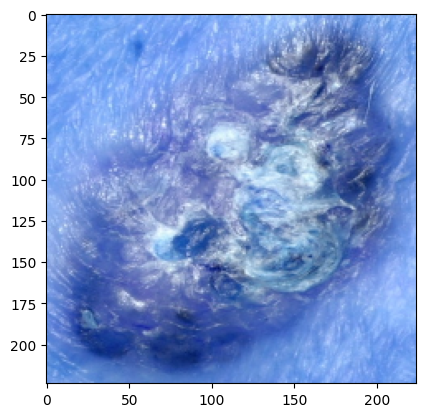

In [39]:
plt.imshow(x[0])
y[0]

In [40]:
torch.cuda.empty_cache()
gc.collect()

3124

In [44]:
import gc

device='cuda'
model = nn.Sequential(timm.create_model('davit_base.msft_in1k', drop_path_rate=.7,num_classes=1,pretrained=True), nn.Sigmoid())
model.to(device)
optimizer = optim.AdamW(model.parameters(),lr=0.00015,weight_decay=5)
gamma = .994
scheduler = ExponentialLR(optimizer, gamma=gamma)
num_epochs = 6

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for x,y in dataloader:
        x = x.permute(0,3,1,2)
        optimizer.zero_grad()
        outputs= model(x.to(device))
        loss = criterion(outputs.squeeze(1), y.to(device))
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    
    model.eval()
    running_loss2=0
    with torch.no_grad():
        for x,y_tst in test_dataloader:
            x = x.permute(0,3,1,2)
            outputs_tst = model(x.to(device))
            loss2 = criterion(outputs_tst.squeeze(1), y_tst.to(device))
            running_loss2 += loss2.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f}, Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

Epoch [1/6], Loss: 0.40920,  Test Loss: 0.33663, Learning Rate: 0.0000873
Epoch [2/6], Loss: 0.27417,  Test Loss: 0.24948, Learning Rate: 0.0000508
Epoch [3/6], Loss: 0.23162,  Test Loss: 0.23315, Learning Rate: 0.0000295
Epoch [4/6], Loss: 0.18908,  Test Loss: 0.22742, Learning Rate: 0.0000172
Epoch [5/6], Loss: 0.16378,  Test Loss: 0.24013, Learning Rate: 0.0000100
Epoch [6/6], Loss: 0.15406,  Test Loss: 0.23085, Learning Rate: 0.0000058
Training finished!


In [63]:
def find_optim_thres(fpr, tpr, thresholds):
    optim_thres = thresholds[0]
    inx = 0
    min_dist = 1.0
    for i in range(len(fpr)):
        dist = np.linalg.norm(np.array([0.0, 1.0]) - np.array([fpr[i], tpr[i]]))
        if dist < min_dist:
            min_dist = dist
            optim_thres = thresholds[i]
            inx = i
            
    return optim_thres, inx
    
def test_model(model,criterion,dataloader, threshold=.5):
    device='cuda'
    since = time.time()
    metricf1 = BinaryF1Score()
    precision = BinaryPrecision()
    recall = BinaryRecall()
    accuracy = BinaryAccuracy()
    roc = BinaryROC()
    auc = BinaryAUROC()
    stop_count = 0
    best_f1 = -1.0
    test_metrics = {'loss' : [], 'acc' : [], 'f1': [], 'precision': [], 'recall': [], 'auc': []}
    # inital threshold for first epoch, it will change afterwards
#     threshold = 0.5
    print('Starting testing...')
    # empty 'all' tensors for saving
    all_outputs = torch.Tensor([])
    all_labels = torch.Tensor([])
    model.eval()   # Set model to evaluate mode
    running_loss = 0.0
    n_samples = 0
    n_correct = 0
    running_f1 = 0.0
    # Iterate over data.
    for inputs, labels in (dataloader):
        labels = torch.unsqueeze(torch.tensor(labels), 1).to(dtype=torch.float)               
        #labels=torch.tensor(labels)
        inputs = inputs.permute(0,3,1,2)
        inputs = inputs.float().to(device)
        #inputs = inputs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
        # zero the parameter gradients
            outputs = model(inputs)
            #preds = (outputs > threshold).double()
            # concatenating all outputs and labels for calculation aoc and new threshold
            all_outputs = torch.cat((all_outputs, outputs.to('cpu')))
            all_labels = torch.cat((all_labels, labels.to('cpu')))                  
            #print(labels)
            # _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
        running_loss += loss.item()
        #n_correct += (preds == labels).sum().item()
        # collect any unused memmory
        gc.collect()
        torch.cuda.empty_cache()  
        
    # statistics
    epoch_loss = running_loss / len(dataloader)            
    # find true positive and false positive rates for ROC curve
    #print ('outputs: ', all_outputs, 'labels', all_labels)
    all_labels=all_labels.to(dtype=torch.long)
    fpr, tpr, thresholds = roc(all_outputs, all_labels)
    epoch_auc = auc(all_outputs, all_labels)
    # find new threshold
    threshold, _ = find_optim_thres(fpr, tpr, thresholds)
    print(f'New threshold is {threshold}')
    # calculate metrics using new optimized threshold
    epoch_f1 = metricf1(all_outputs > threshold, all_labels)
    epoch_acc = accuracy(all_outputs > threshold, all_labels)
    epoch_precision = precision(all_outputs > threshold, all_labels)
    epoch_recall = recall(all_outputs > threshold, all_labels)
    # save all of the statistics for latter analysis
    test_metrics['loss'].append(epoch_loss)
    test_metrics['acc'].append(epoch_acc)
    test_metrics['f1'].append(epoch_f1)
    test_metrics['precision'].append(epoch_precision)
    test_metrics['recall'].append(epoch_recall)
    test_metrics['auc'].append(epoch_auc)               
    time_elapsed = time.time() - since

    print(f'Inference complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'F1 Score = : {epoch_f1:4f}')
    print(f'AUC Score = : {epoch_auc:4f}')
    print(f'Acc Score = : {epoch_acc:4f}')
    return test_metrics

In [64]:
import time
import tqdm
test_metrics = test_model(model, criterion, test_dataloader)


Starting testing...


C:\Users\marcb\AppData\Local\Temp\ipykernel_7948\539848122.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.unsqueeze(torch.tensor(labels), 1).to(dtype=torch.float)


New threshold is 0.32165274024009705
Inference complete in 0m 3s
F1 Score = : 0.899536
AUC Score = : 0.967087
Acc Score = : 0.908192


In [65]:
model_name = 'davit_base'
PATH='weights/'+model_name
torch.save(model.state_dict(), PATH)

# Multiclass Cancer Classification

## Multiclass model 1 (currently not training)

In [1]:
import pandas as pd
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

path1_test= '../datasets/cancer/multiclass/ISIC/Test/'
p1=os.listdir(path1_test)
full_files=[]
full_labels=[]
for i in p1:
    labels=[]
    files = os.listdir(path1_test+i)
    files = [path1_test+i+'/'+x for x in files]
    full_files.append(files)
    if 'actinic' in i:
        label_pos = 0
    elif 'basal' in i:
        label_pos = 1
    elif 'dermatofibroma' in i:
        label_pos = 2
    elif 'melanoma' in i:
        label_pos = 3
    elif 'nevus' in i:
        label_pos = 4
    elif 'pigmented' in i:
        label_pos = 5
    elif 'seborrheic' in i:
        label_pos = 6
    elif 'squamous' in i:
        label_pos = 7
    elif 'vascular' in i:
        label_pos = 8

    for j in files:
        label_row = [0,0,0,0,0,0,0,0,0]
        label_row[label_pos]=1
        labels.append(label_row)
    full_labels.append(labels)


path1_train =  '../datasets/cancer/multiclass/ISIC/Train/'

In [2]:
full_labels=torch.tensor(np.vstack(full_labels))
full_files=np.hstack(full_files)
full_labels

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1]], dtype=torch.int32)

In [3]:
full_files

array(['../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0010512.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0010889.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024468.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024470.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024511.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024646.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024654.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024707.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024763.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024771.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis/ISIC_0024800.jpg',
       '../datasets/cancer/multiclass/ISIC/Test/actinic keratosis

In [4]:
import cv2
count=0
test_images = np.zeros([len(full_files),224,224,3])
for i in full_files:
    im= cv2.resize(cv2.imread(i),[224,224], interpolation=cv2.INTER_CUBIC)
    im = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
    im = np.nan_to_num(im)
    test_images[count]=im
    count=count+1
test_images = torch.tensor(test_images)

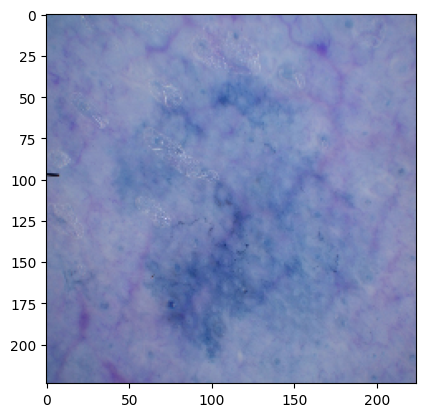

In [5]:
plt.imshow(test_images[0])

In [6]:
import pandas as pd
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

path1_train =  '../datasets/cancer/multiclass/ISIC/Train/'
p1=os.listdir(path1_train)
full_files_train=[]
full_labels_train=[]
for i in p1:
    labels=[]
    files = os.listdir(path1_train+i)
    files = [path1_train+i+'/'+x for x in files]
    full_files_train.append(files)
    if 'actinic' in i:
        label_pos = 0
    elif 'basal' in i:
        label_pos = 1
    elif 'dermatofibroma' in i:
        label_pos = 2
    elif 'melanoma' in i:
        label_pos = 3
    elif 'nevus' in i:
        label_pos = 4
    elif 'pigmented' in i:
        label_pos = 5
    elif 'seborrheic' in i:
        label_pos = 6
    elif 'squamous' in i:
        label_pos = 7
    elif 'vascular' in i:
        label_pos = 8

    for j in files:
        label_row = [0,0,0,0,0,0,0,0,0]
        label_row[label_pos]=1
        labels.append(label_row)
    full_labels_train.append(labels)




In [7]:
full_labels_train=torch.tensor(np.vstack(full_labels_train))
full_files_train=np.hstack(full_files_train)
full_labels_train

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1]], dtype=torch.int32)

In [8]:
full_labels_train.shape

torch.Size([2229, 9])

In [9]:
import cv2
count=0
train_images = np.zeros([len(full_files_train),224,224,3])
for i in full_files:
    im= cv2.resize(cv2.imread(i),[224,224], interpolation=cv2.INTER_CUBIC)
    im = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
    im = np.nan_to_num(im)
    train_images[count]=im
    count=count+1
train_images = torch.tensor(train_images)

In [10]:


from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        images = self.images[index]
        labels = self.labels[index]
        return images.float(), labels.float()

In [18]:
from torch.optim.lr_scheduler import ExponentialLR
import torch.optim as optim
import torch.nn as nn

dataset = CustomDataset(train_images, full_labels_train)
# Create a dataloader
batch_size = 64

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = CustomDataset(test_images,full_labels)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 64
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

criterion = nn.CrossEntropyLoss()

In [12]:
len(test_images)

128

In [19]:
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [14]:
torch.cuda.empty_cache()
gc.collect()

477

In [24]:
import gc
import timm
device='cuda'
model = nn.Sequential(timm.create_model('efficientformerv2_s0', drop_path_rate=.0,num_classes=9,pretrained=True), nn.Softmax(dim=1))
model.to(device)
optimizer = optim.AdamW(model.parameters(),lr=0.0004,weight_decay=0.0001)
gamma = .9994
scheduler = ExponentialLR(optimizer, gamma=gamma)
num_epochs = 60

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for x,y in dataloader:
        x = x.permute(0,3,1,2)
        optimizer.zero_grad()
        outputs= model(x.to(device))
        loss = criterion(outputs.squeeze(1), y.to(device))
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    
    model.eval()
    running_loss2=0
    with torch.no_grad():
        for x,y_tst in test_dataloader:
            x = x.permute(0,3,1,2)
            outputs_tst = model(x.to(device))
            loss2 = criterion(outputs_tst.squeeze(1), y_tst.to(device))
            running_loss2 += loss2.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f}, Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

Epoch [1/60], Loss: 2.14290,  Test Loss: 2.23139, Learning Rate: 0.0003917
Epoch [2/60], Loss: 2.10432,  Test Loss: 2.24685, Learning Rate: 0.0003835
Epoch [3/60], Loss: 2.09249,  Test Loss: 2.24672, Learning Rate: 0.0003756
Epoch [4/60], Loss: 2.08454,  Test Loss: 2.24683, Learning Rate: 0.0003678
Epoch [5/60], Loss: 2.08406,  Test Loss: 2.24683, Learning Rate: 0.0003601
Epoch [6/60], Loss: 2.08656,  Test Loss: 2.24692, Learning Rate: 0.0003526
Epoch [7/60], Loss: 2.08310,  Test Loss: 2.24685, Learning Rate: 0.0003453
Epoch [8/60], Loss: 2.08145,  Test Loss: 2.24689, Learning Rate: 0.0003381
Epoch [9/60], Loss: 2.08177,  Test Loss: 2.24693, Learning Rate: 0.0003311
Epoch [10/60], Loss: 2.08136,  Test Loss: 2.24690, Learning Rate: 0.0003242
Epoch [11/60], Loss: 2.08264,  Test Loss: 2.24694, Learning Rate: 0.0003175
Epoch [12/60], Loss: 2.08502,  Test Loss: 2.24694, Learning Rate: 0.0003109
Epoch [13/60], Loss: 2.08130,  Test Loss: 2.24694, Learning Rate: 0.0003044
Epoch [14/60], Loss: 

KeyboardInterrupt: 

## Multiclass model 2

In [38]:
import pandas as pd
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

# path1_test= '../datasets/cancer/multiclass/ISIC/Test/'
# p1=os.listdir(path1_test)
# full_files=[]
# full_labels=[]
base='../datasets/cancer/multiclass/ham10000/'
meta = pd.read_csv(base+'GroundTruth.csv')


In [55]:
images = np.zeros([len(meta),400, 400,3])
for i in range(len(meta)-1):
    im= cv2.resize(cv2.imread(base+'images/'+meta.image[i]+'.jpg'),[400,400], interpolation=cv2.INTER_LANCZOS4)
    im = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
    im = np.nan_to_num(im)
    images[i]=im
images = torch.tensor(images)
    

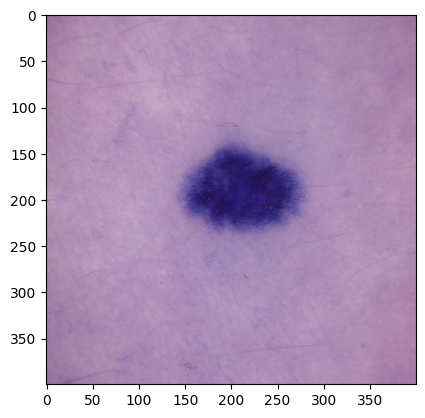

In [47]:
im= cv2.resize(cv2.imread(base+'images/'+meta.image[i]+'.jpg'),[400,400], interpolation=cv2.INTER_LANCZOS4)
plt.imshow(im)

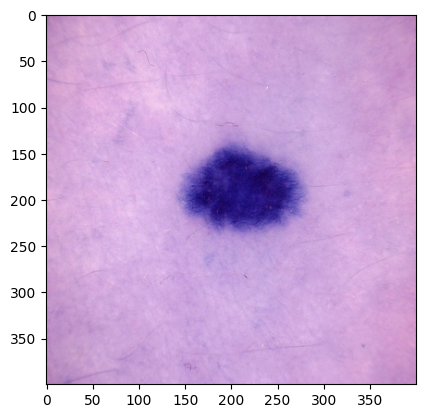

In [49]:
im2 = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
plt.imshow(im2)

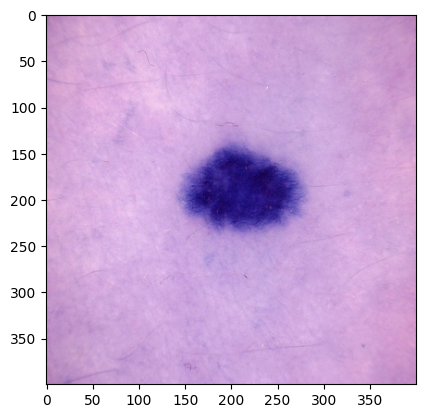

In [50]:
im = np.nan_to_num(im)
plt.imshow(im2)

In [54]:
np.max(images[100])

0.0